<a href="https://colab.research.google.com/github/Hasan-024/ML-Projects/blob/main/MNIST_dataset_project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Call necessary functions**

In [ ]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Call the *MNIST* *dataset* from keras**

In [ ]:
(train_img,train_output),(test_img,test_output) = keras.datasets.fashion_mnist.load_data()

In [ ]:
train_img.shape

(60000, 28, 28)

The number of training images is 60,000. Each of the image is consisting of 28X28 pixels = 784 input neurons

In [ ]:
test_img.shape

(10000, 28, 28)

The test dataset consists of 10,000 images

In [ ]:
train_img[40,25,25]

0

HERE we look at an image . The images are in gray scale so the output will range from 0-255. Output of 0 means the image is black whereas, 255 means it is white.

In [ ]:
train_output[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

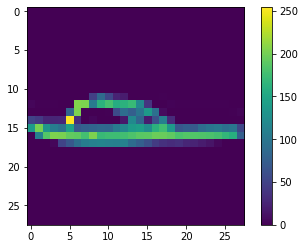

In [ ]:
plt.figure()
plt.imshow(train_img[30])
plt.colorbar()
plt.show()

As we can see, the 31st sample of the training dataset shows us an image of a sandal.

Now it's time for **data pre-processing**

In [ ]:
train_img = train_img / 255
test_img = test_img / 255

In [ ]:
train_img[255,23,23]

0.5568627450980392

All the gray scale images have been transformed into values of 0 to 1.

**It's time to build the model using keras**

In [ ]:
model = keras.Sequential(
    [
     keras.layers.Flatten(input_shape =(28,28)),
     keras.layers.Dense(128,activation = "relu"),
     keras.layers.Dense(10,activation = "softmax")
    ]
)

Flatten >>>> it flattens the (28,28) dimensional input into a vector of 784 neurons.
Dense >>>> It connects every neuron in a layer to the previous layers.

**Now we have to optimize the model with**
 Optimizer, Loss functions and Metrics 

In [ ]:
model.compile(optimizer= "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

**Time to train the model**

In [ ]:
model.fit(train_img, train_output, batch_size = 50, epochs = 10)

Epoch 1/10
1200/1200 [==============================] - 4s 3ms/step - loss: 0.5146 - accuracy: 0.8206
Epoch 2/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3847 - accuracy: 0.8625
Epoch 3/10
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3438 - accuracy: 0.8745
Epoch 4/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3153 - accuracy: 0.8852
Epoch 5/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2980 - accuracy: 0.8901
Epoch 6/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2831 - accuracy: 0.8966
Epoch 7/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2718 - accuracy: 0.8995
Epoch 8/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2605 - accuracy: 0.9041
Epoch 9/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2506 - accuracy: 0.9075
Epoch 10/10
1200/1200 [==============================] - 3s 2ms/step - loss: 0.242

Let's test the model now


In [ ]:
test_loss, test_accuracy = model.evaluate(test_img, test_output, verbose = 1)
print ("The accuracy of the model is", test_accuracy)
print ("The loss of the model is", test_loss)

313/313 [==============================] - 0s 1ms/step - loss: 0.3266 - accuracy: 0.8818
The accuracy of the model is 0.8817999958992004
The loss of the model is 0.32657167315483093


The reduced accuracy of the model is a result of the sequential model. The **sequential model is only useful when there is only one input and output** of the model, unlike this dataset.

Let's make some predictions of the model and see if they work.

In [ ]:
predictions = model.predict(test_img)

In [ ]:
prediction_1 = predictions[54]
prediction_1

array([2.7019129e-04, 5.8282309e-05, 9.6221781e-01, 3.4150446e-05,
       3.5191480e-02, 3.8701464e-09, 2.2200556e-03, 2.2336646e-10,
       7.9901192e-06, 6.2821108e-08], dtype=float32)

We have to get a value of the highest score

In [ ]:
prediction_1 = np.argmax(prediction_1)
prediction_1

2

Now let's check what the test_output show the value of the exact product which is a pullover accoridng to the training and test dataset.

In [ ]:
test_output[54]

2

So the output matches!!!!!!

Pick a number: 54


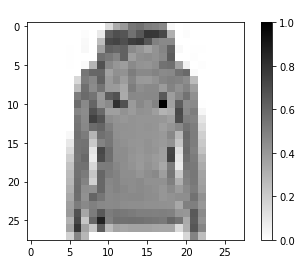

In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a number: ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print("Try again...")

num = get_number()
image = test_img[num]
label = test_output[num]
predict(model, image, label)

So the item number 54 was a pullover defined by class 2.